In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# uploading file from local drive
from google.colab import files
uploaded = files.upload()

Saving USD_PKR Historical Data.csv to USD_PKR Historical Data (8).csv


In [ ]:
import io
# storing dataset in a Pandas Dataframe
df2 = pd.read_csv(io.BytesIO(uploaded['USD_PKR Historical Data.csv']))

In [ ]:
print(df2)

              Date    Price     Open     High     Low Change %
0     Jan 01, 2020  154.870  154.870  155.270  154.87   -0.08%
1     Dec 31, 2019  155.000  154.970  155.410  154.97    0.03%
2     Dec 30, 2019  154.950  154.430  155.340  154.43    0.06%
3     Dec 28, 2019  154.850  154.850  154.850  154.85    0.00%
4     Dec 27, 2019  154.850  155.480  155.900  154.80    0.08%
...            ...      ...      ...      ...     ...      ...
4436  Jan 07, 2005   59.600   59.550   59.610   59.52   -0.03%
4437  Jan 06, 2005   59.620   59.550   59.640   59.54    0.03%
4438  Jan 05, 2005   59.605   59.560   59.605   59.53    0.09%
4439  Jan 04, 2005   59.550   59.485   59.675   59.40    0.15%
4440  Jan 03, 2005   59.460   59.410   59.540   59.40    0.06%

[4441 rows x 6 columns]


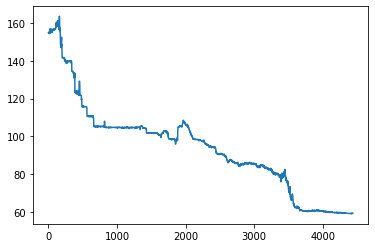

In [ ]:
plt.plot(df2['Price'])
plt.show()

Note: indexing here is used to visualize the dates on the X-axis.

In [ ]:
#specifying the data frame of our interest
df = df2['Price']
print(df)

0       154.870
1       155.000
2       154.950
3       154.850
4       154.850
         ...   
4436     59.600
4437     59.620
4438     59.605
4439     59.550
4440     59.460
Name: Price, Length: 4441, dtype: float64


In [ ]:
#importing useful libraries
import numpy as np
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
# fixing random seed for reproducibility
np.random.seed(7)

In [ ]:
# loading the dataset
data_set = df.values
data_set = data_set.astype('float32')

**Data** **Preprocessing**

In [ ]:
# normalizing the dataset using the MinMaxScaler preprocessing class from the scikit-learn library
dataset = np.array(data_set).reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
# spliting dataset into train and test sets
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

3552 889


In [ ]:
# converting an array of values into a dataset matrix
def create_dataset(dataset, look_back):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

The above function takes two arguments: the dataset, which is a NumPy array that we want to convert into a dataset, and the look_back, which is the number of previous time steps to use as input variables to predict the next time period — in this case 5 as mentioned in word file.

New Normallized Dataset

In [ ]:
# using the function to prepare the train and test datasets for modeling (reshape into X(t-5),X(t-4),X(t-3),X(t-2),X(t-1),Y(t))
look_back = 5
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(3546, 5)
(3546,)
(883, 5)
(883,)


In [ ]:
# reshaping input X to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1,trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1,testX.shape[1]))

In [ ]:
print(trainX.shape)
print(testX.shape)

(3546, 1, 5)
(883, 1, 5)


We are now ready to design and fit our LSTM network for this problem.

**Defining the LSTM Model**

In [ ]:
# creating and fitting the LSTM network
model = Sequential()
model.add(LSTM(100, input_shape=(1, look_back)))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               42400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 42,501
Trainable params: 42,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compiling
model.compile(loss='mean_squared_error', optimizer='adam')
# training
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
3546/3546 - 8s - loss: 0.0010
Epoch 2/50
3546/3546 - 6s - loss: 8.8779e-05
Epoch 3/50
3546/3546 - 6s - loss: 8.6792e-05
Epoch 4/50
3546/3546 - 6s - loss: 8.1960e-05
Epoch 5/50
3546/3546 - 6s - loss: 6.9549e-05
Epoch 6/50
3546/3546 - 6s - loss: 7.2169e-05
Epoch 7/50
3546/3546 - 6s - loss: 6.9725e-05
Epoch 8/50
3546/3546 - 6s - loss: 6.6097e-05
Epoch 9/50
3546/3546 - 6s - loss: 5.8436e-05
Epoch 10/50
3546/3546 - 6s - loss: 5.6053e-05
Epoch 11/50
3546/3546 - 6s - loss: 6.0401e-05
Epoch 12/50
3546/3546 - 6s - loss: 6.0552e-05
Epoch 13/50
3546/3546 - 6s - loss: 5.9395e-05
Epoch 14/50
3546/3546 - 6s - loss: 5.1313e-05
Epoch 15/50
3546/3546 - 6s - loss: 4.9038e-05
Epoch 16/50
3546/3546 - 6s - loss: 5.1385e-05
Epoch 17/50
3546/3546 - 6s - loss: 5.3286e-05
Epoch 18/50
3546/3546 - 6s - loss: 5.3649e-05
Epoch 19/50
3546/3546 - 6s - loss: 4.6132e-05
Epoch 20/50
3546/3546 - 6s - loss: 5.1317e-05
Epoch 21/50
3546/3546 - 6s - loss: 4.9256e-05
Epoch 22/50
3546/3546 - 6s - loss: 4.5082e-05
E

In [ ]:
#Prediction using the trained model
scaler.scale_

y_pred = model.predict(testX)
# inverting predictions
y_pred = scaler.inverse_transform(y_pred)
# printing predicted prices
print(y_pred[:7])

[[67.9022  ]
 [68.54734 ]
 [68.87254 ]
 [69.21313 ]
 [68.75862 ]
 [68.602356]
 [68.47463 ]]


In [ ]:
# printing original prices
y_test = np.array(testY).reshape(-1,1)
# for un-normalizing
y_test = scaler.inverse_transform(y_test)
print(y_test[:7])

[[69.27 ]
 [69.31 ]
 [69.65 ]
 [68.45 ]
 [68.5  ]
 [68.505]
 [68.6  ]]


In [ ]:
#Mean Squared Error
mean_squared_error(y_test,y_pred)

0.048131067

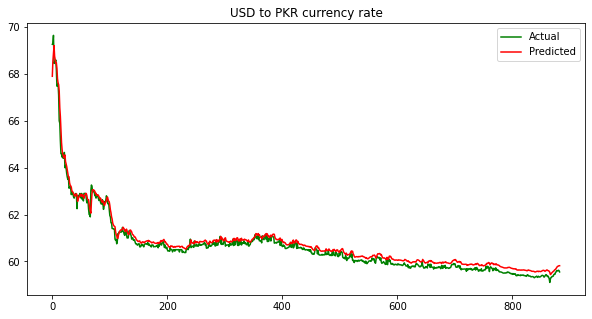

In [ ]:
#Visualizing the results
plt.figure(figsize=(10,5))
plt.title('USD to PKR currency rate')
plt.plot(y_test , label = 'Actual', color = 'g')
plt.plot(y_pred , label = 'Predicted', color = 'r')
plt.legend()

Acc to graph, the predicted values fit well with the actual ones.